In [2]:
# hide
# importing requirements
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
# hide
# importing requirements
from fastbook import *
from fastai.vision.widgets import *

# Getting images from Bing

In [19]:
key = os.environ.get('AZURE_SEARCH_KEY', '3e02f44c61c1427e87c97c52d9fc300e')

In [20]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [21]:
# creating a list with 150 URL from stratocaster images
results = search_images_bing(key, 'stratocaster')
ims = results.attrgot('contentUrl')
len(ims)

150

In [24]:
# getting the first URL
ims[0]

'https://guitar.com/wp-content/uploads/2020/12/GM388-rev-Fender-American-Professional-II-Stratocaster-01@2160x2700.jpg'

In [27]:
dest = 'images/stratocaster.jpg'
download_url(ims[0], dest)

Path('images/stratocaster.jpg')

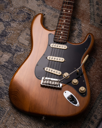

In [29]:
im = Image.open(dest)
im.to_thumb(128,128)

In [37]:
# defining guitar types and our main path for the guitar images
# v1 guitar_types = 'stratocaster','telecaster','les paul', 'sg'
guitar_types = 'Stratocaster','Flying v','Les paul'
path = Path('guitars')

In [38]:
# getting the URL for all guitar_types and saving them into separated folders according to their types
if not path.exists():
    path.mkdir()
    for o in guitar_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} guitar')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [39]:
fns = get_image_files(path)
fns

(#432) [Path('guitars/stratocaster/f76e0ca8-20e3-43e2-87ff-2914a0050f55.jpg'),Path('guitars/stratocaster/1e6f20b0-2048-439d-89ee-88ad09112724.jpg'),Path('guitars/stratocaster/81d146dc-f729-4655-b4ee-71d25e89d061.jpg'),Path('guitars/stratocaster/a1fb9919-4028-4a3a-8a71-7128423b5edf.jpg'),Path('guitars/stratocaster/e1731ee4-1e28-4688-9bb2-baf2f7033560.jpg'),Path('guitars/stratocaster/c0361a88-5d7a-4c03-9bfe-455e51f86628.jpg'),Path('guitars/stratocaster/56ceae65-bbe7-44d1-8846-fa38eb4810d2.jpg'),Path('guitars/stratocaster/efea1e42-67ee-4f8e-b003-98133f4493f0.jpg'),Path('guitars/stratocaster/4d1d4c26-e749-439c-9646-33e87dedee8e.jpg'),Path('guitars/stratocaster/2cc582c4-cb2d-4e63-b3db-47f1346d0480.png')...]

In [40]:
failed = verify_images(fns)
failed

(#0) []

In [41]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [43]:
# Creating our data block, which is has images and we'll work with categories (Stratocaster','Flying v','Les paul)
# We'll separete randomly 20% of the images and seed them to use the same all the time, using directoty name as category, resizing to 128
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [44]:
# defining our dataloaders with the guitar data block
dls = guitars.dataloaders(path)

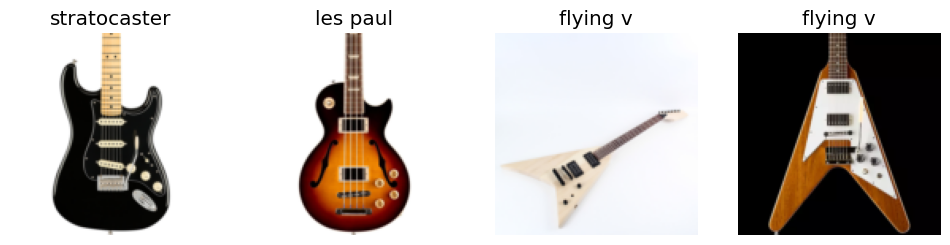

In [45]:
dls.valid.show_batch(max_n=4, nrows=1)

In [46]:
# not used, just tested
# guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dls = guitars.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

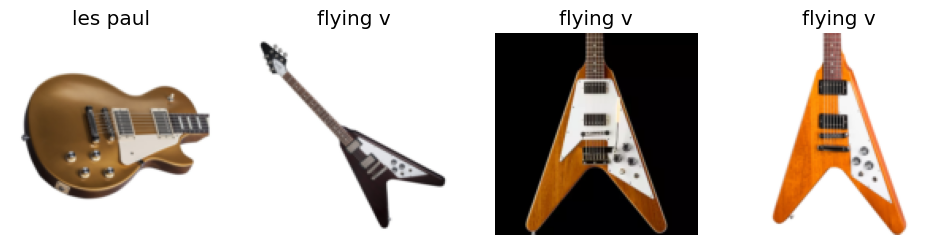

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = guitars.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = guitars.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

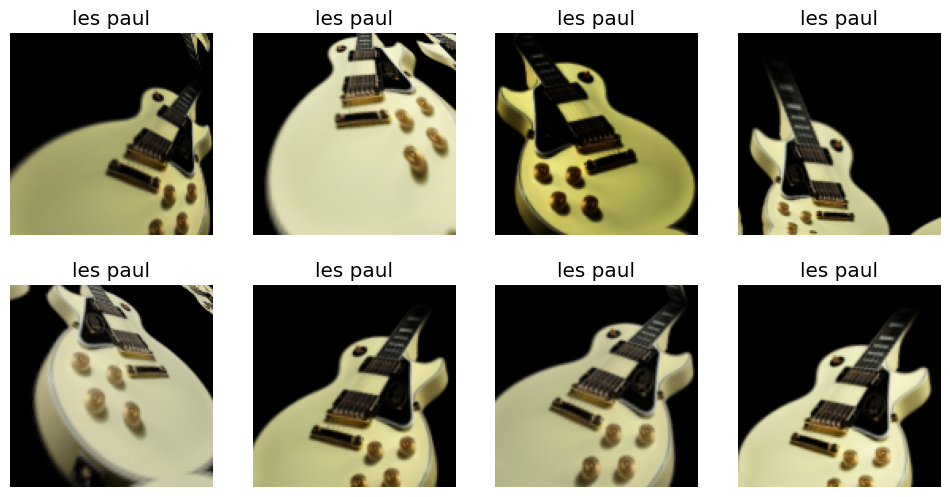

In [ ]:
# not used, just tested
# guitars = guitars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = guitars.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

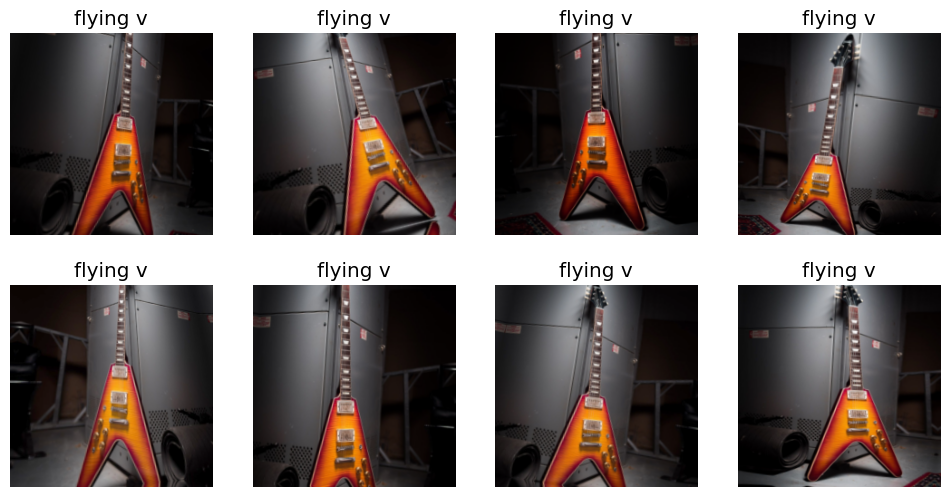

In [ ]:
# not used, just tested
# guitars = guitars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
# dls = guitars.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [48]:
# training our model
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


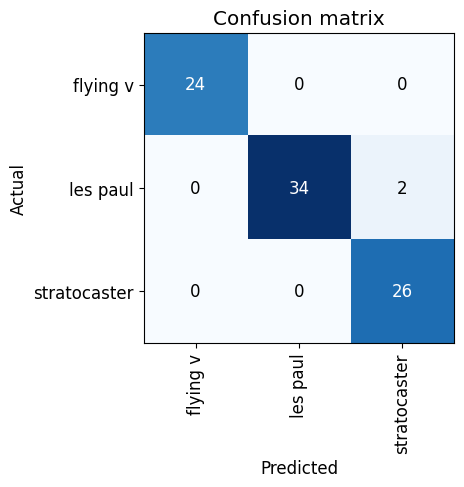

In [49]:
# generation the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

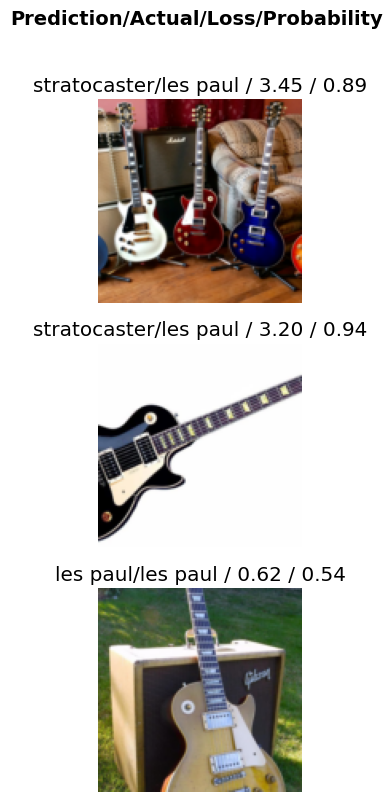

In [50]:
interp.plot_top_losses(3, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

In [ ]:
learn_inf.dls.vocab

['flying v', 'les paul', 'stratocaster']

### Turning Your Notebook into a Real App

Go to [Huggingface](https://huggingface.co/spaces/sahviola/guitar-classifier) to see the results ;)